# Factors that affect the BorrowerAPR or the Interest Rate

## Investigation Overview

In this investigation, we'll get to look at the relationships between different features and interest rates.

## Dataset Overview

This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The dataset can be found [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv) and a detailed description of all the features can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/). 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('.\data\prosperLoanData.csv')

In [3]:
# convert ProsperRating (Alpha) into ordered categorical types
# convert LoanStatus and EmploymentStatus to 
# ordered categorical types as well even though they're nominal not ordinal to
# gain consistency between different plots and have the same order

ordinal_var_dict = {'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],
                    'LoanStatus': loans.LoanStatus.value_counts().sort_index().index,
                    'EmploymentStatus': loans.EmploymentStatus.value_counts().sort_index().index}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

## Distribution of BorrowerAPR

BorrowerAPR in the dataset takes on a multi-modal distribution with peaks around 0.125, 0.188, 0.213, 0.288 and 0.350.

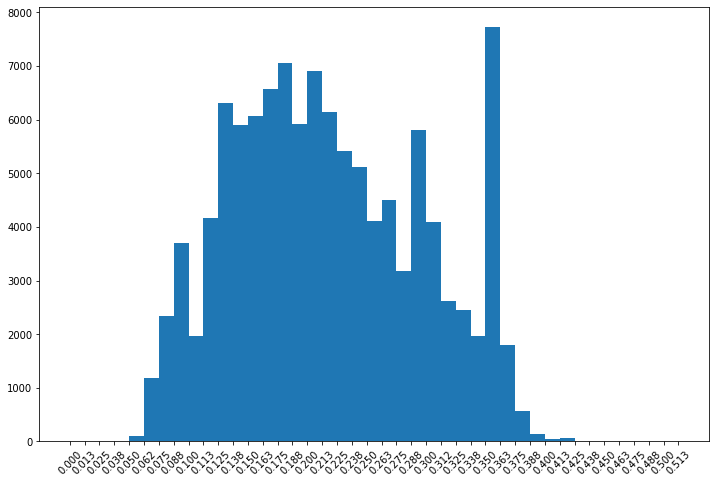

In [4]:
plt.figure(figsize=(12, 8))
bin_edges = np.arange(0, loans.BorrowerAPR.max()+0.0125, 0.0125)
plt.hist(loans.BorrowerAPR, bins=bin_edges)
plt.xticks(ticks=bin_edges, labels=['{:.3f}'.format(v) for v in bin_edges], rotation=45)
plt.show()

## Distribution of Original Loan Amounts

Loan Original Amount in the dataset takes on a multi-modal distribution as well with top 4 peaks at 4000, 15000, 10000 & 5000.

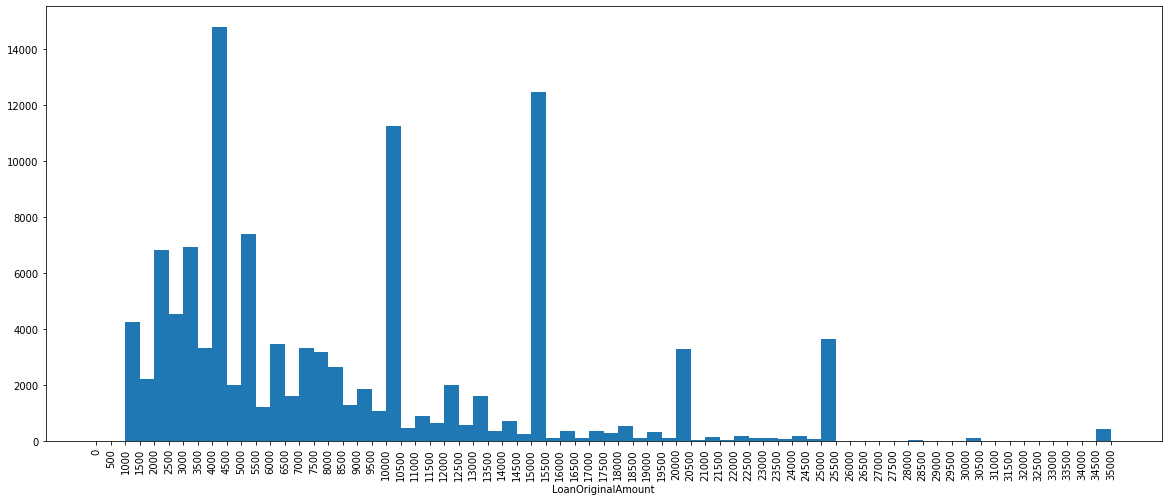

In [5]:
plt.figure(figsize=(20, 8))
bin_edges = np.arange(0, loans.LoanOriginalAmount.max()+500, 500)
plt.hist(loans.LoanOriginalAmount, bins=bin_edges)
plt.xticks(ticks=bin_edges, labels=['{}'.format(v) for v in bin_edges], rotation=90)
plt.xlabel('LoanOriginalAmount');

## BorrowerAPR VS LoanOriginalAmount

Plotting the BorrowerAPR against the LoanOriginalAmount below depicts the negative correlation between the two variables. Meaning that the higher the loan amount is, the lower the interest rate becomes.

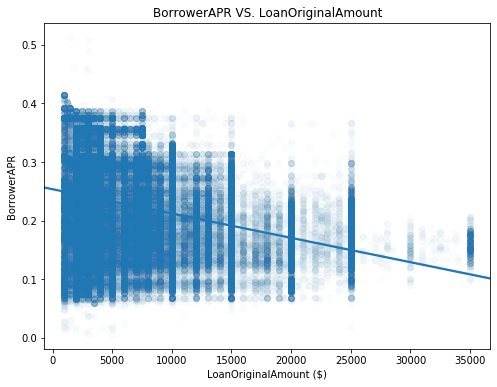

In [11]:
plt.figure(figsize = [8, 6])
sb.regplot(data=loans, x='LoanOriginalAmount', y='BorrowerAPR',
          scatter_kws={'alpha':1/50})
plt.xlabel('LoanOriginalAmount ($)')
plt.title('BorrowerAPR VS. LoanOriginalAmount')
plt.show()

## Distribution of ProsperRating

Prosper Rating is a rating given by the company to the different borrowers based on their payments history. We find below that the ProsperRating takes on a normal distribution with the most common rating being C.

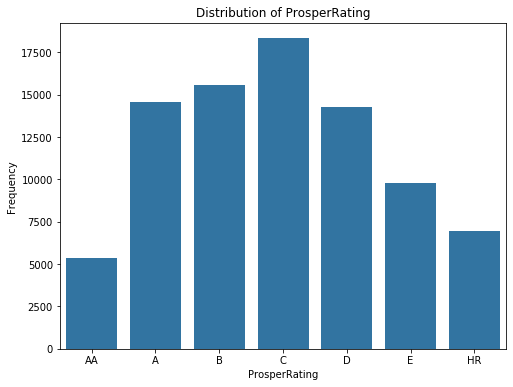

In [17]:
plt.figure(figsize=(8, 6))
sb.countplot(loans['ProsperRating (Alpha)'], color=base_color, 
             order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])
plt.xlabel('ProsperRating')
plt.ylabel('Frequency')
plt.title('Distribution of ProsperRating')
plt.show()

## BorrowerAPR VS. ProsperRating

The below figure depicts the relationship between the BorrowerAPR and the ProsperRating and we can see that the higher the rating, the lower the interest rate becomes.

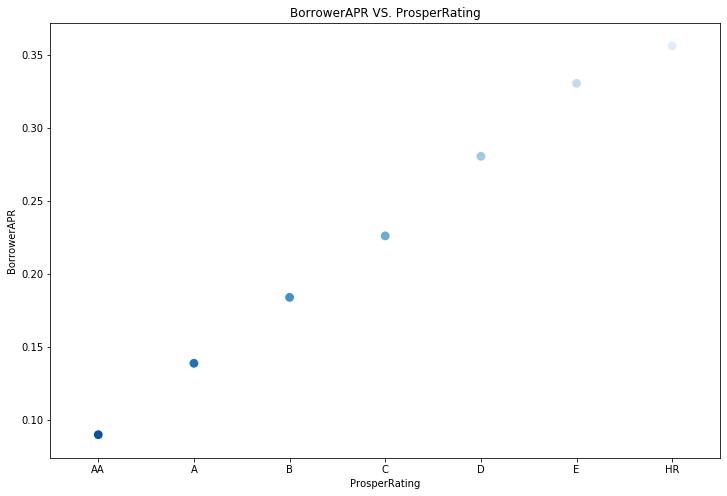

In [21]:
plt.figure(figsize = [12,8])
sb.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR',
                  palette = 'Blues_r', linestyles = '', dodge=True)
plt.title('BorrowerAPR VS. ProsperRating')
plt.xlabel('ProsperRating')
plt.ylabel('BorrowerAPR')
plt.show()

## Distribution of Loan Status

We find below that the majority of the loans are either Current, Completed, Chargedoff or Defaulted.

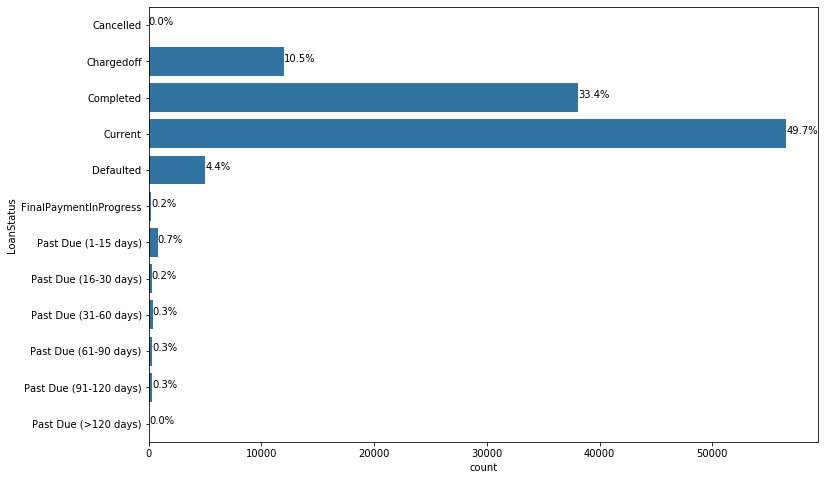

In [12]:
ax = plt.figure(figsize=(12, 8))
base_color = sb.color_palette()[0]
ax = sb.countplot(data=loans, y='LoanStatus', color=base_color)
total = len(loans.LoanStatus)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y));

## Loan Status VS. BorrowerAPR

We find below that the Chargedoff, Defaulted and Pastdue loans have higher BorrowerAPR on average.

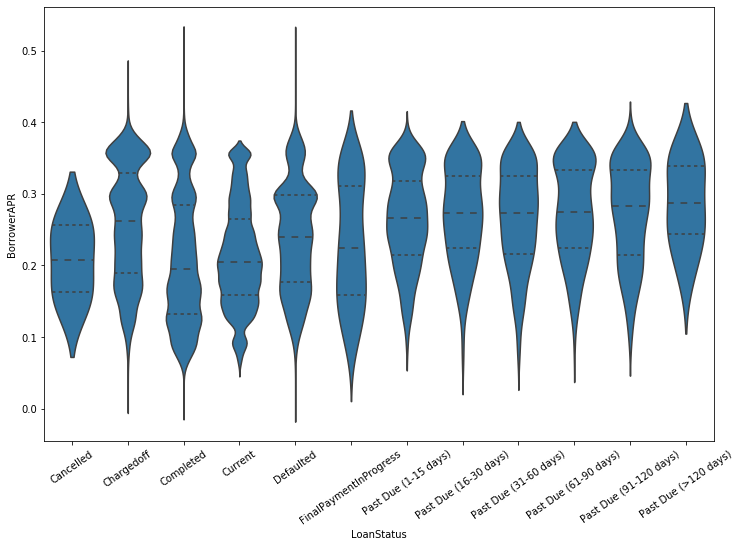

In [14]:
plt.figure(figsize=(12, 8))
sb.violinplot(data=loans, x='LoanStatus', y='BorrowerAPR',
             color=base_color, inner='quartile')
plt.xticks(rotation=35);